In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
import math
import seaborn as sns

### Data Preparation

In [2]:
train = pd.read_csv("Dataset/House/train.csv",index_col=0)
test = pd.read_csv("Dataset/House/test.csv",index_col=0)

In [365]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna(train["GarageYrBlt"].mean())

train.loc[:, "TotalBsmtSF"] = train.loc[:, "TotalBsmtSF"].fillna(0)
train.loc[:, "BsmtFinSF2"] = train.loc[:, "BsmtFinSF2"].fillna(0)
train.loc[:, "BsmtFinSF1"] = train.loc[:, "BsmtFinSF1"].fillna(0)
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna(0)

In [366]:
train["Electrical"].mode()
train.loc[:, "Electrical"] = train.loc[:, "Electrical"].fillna('SBrkr')

In [367]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
test.loc[:, "Alley"] = test.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
test.loc[:, "BedroomAbvGr"] = test.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
test.loc[:, "BsmtQual"] = test.loc[:, "BsmtQual"].fillna("No")
test.loc[:, "BsmtCond"] = test.loc[:, "BsmtCond"].fillna("No")
test.loc[:, "BsmtExposure"] = test.loc[:, "BsmtExposure"].fillna("No")
test.loc[:, "BsmtFinType1"] = test.loc[:, "BsmtFinType1"].fillna("No")
test.loc[:, "BsmtFinType2"] = test.loc[:, "BsmtFinType2"].fillna("No")
test.loc[:, "BsmtFullBath"] = test.loc[:, "BsmtFullBath"].fillna(0)
test.loc[:, "BsmtHalfBath"] = test.loc[:, "BsmtHalfBath"].fillna(0)
test.loc[:, "BsmtUnfSF"] = test.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
test.loc[:, "CentralAir"] = test.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
test.loc[:, "Condition1"] = test.loc[:, "Condition1"].fillna("Norm")
test.loc[:, "Condition2"] = test.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
test.loc[:, "EnclosedPorch"] = test.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
test.loc[:, "ExterCond"] = test.loc[:, "ExterCond"].fillna("TA")
test.loc[:, "ExterQual"] = test.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
test.loc[:, "Fence"] = test.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
test.loc[:, "FireplaceQu"] = test.loc[:, "FireplaceQu"].fillna("No")
test.loc[:, "Fireplaces"] = test.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
test.loc[:, "Functional"] = test.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
test.loc[:, "GarageType"] = test.loc[:, "GarageType"].fillna("No")
test.loc[:, "GarageFinish"] = test.loc[:, "GarageFinish"].fillna("No")
test.loc[:, "GarageQual"] = test.loc[:, "GarageQual"].fillna("No")
test.loc[:, "GarageCond"] = test.loc[:, "GarageCond"].fillna("No")
test.loc[:, "GarageArea"] = test.loc[:, "GarageArea"].fillna(0)
test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
test.loc[:, "HalfBath"] = test.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
test.loc[:, "HeatingQC"] = test.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
test.loc[:, "KitchenAbvGr"] = test.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
test.loc[:, "KitchenQual"] = test.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
test.loc[:, "LotFrontage"] = test.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
test.loc[:, "LotShape"] = test.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
test.loc[:, "MasVnrType"] = test.loc[:, "MasVnrType"].fillna("None")
test.loc[:, "MasVnrArea"] = test.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
test.loc[:, "MiscFeature"] = test.loc[:, "MiscFeature"].fillna("No")
test.loc[:, "MiscVal"] = test.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
test.loc[:, "OpenPorchSF"] = test.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
test.loc[:, "PavedDrive"] = test.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
test.loc[:, "PoolQC"] = test.loc[:, "PoolQC"].fillna("No")
test.loc[:, "PoolArea"] = test.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
test.loc[:, "SaleCondition"] = test.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
test.loc[:, "ScreenPorch"] = test.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
test.loc[:, "TotRmsAbvGrd"] = test.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
test.loc[:, "Utilities"] = test.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
test.loc[:, "WoodDeckSF"] = test.loc[:, "WoodDeckSF"].fillna(0)
test.loc[:, "GarageYrBlt"] = test.loc[:, "GarageYrBlt"].fillna(test.mean())

test.loc[:, "Electrical"] = test.loc[:, "Electrical"].fillna('SBrkr')

test.loc[:, "TotalBsmtSF"] = test.loc[:, "TotalBsmtSF"].fillna(0)
test.loc[:, "BsmtFinSF2"] = test.loc[:, "BsmtFinSF2"].fillna(0)
test.loc[:, "BsmtFinSF1"] = test.loc[:, "BsmtFinSF1"].fillna(0)
test.loc[:, "GarageYrBlt"] = test.loc[:, "GarageYrBlt"].fillna(0)

In [275]:
train.shape

(1460, 80)

In [276]:
test.shape

(1459, 79)

In [301]:
# train.tail()

In [368]:
data = pd.concat([train,test])
data.shape

(2919, 80)

In [369]:
data1 = data.select_dtypes(include=['object'])
data2 = data.select_dtypes(exclude=['object'])

In [370]:
data_dum = pd.get_dummies(data1, columns=data1.columns, drop_first=True)
data_dum.head()

,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [371]:
data = pd.concat([data_dum,data2],1)
data.head()
data.shape

(2919, 259)

In [372]:
train_dum = pd.DataFrame(data.iloc[0:1460])
test_dum = pd.DataFrame(data.iloc[1460:2919])

In [373]:
train_dum.shape

(1460, 259)

In [374]:
test_dum.shape

(1459, 259)

In [375]:
test_dum.head()

,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,1,0,0,0,0,0,0,0,0,1,...,5,0,NaN,120,5,882.0,140,1961,1961,2010
1462,1,0,0,0,0,0,0,0,0,1,...,6,0,NaN,0,6,1329.0,393,1958,1958,2010
1463,1,0,0,0,0,0,0,0,0,1,...,5,0,NaN,0,6,928.0,212,1997,1998,2010
1464,1,0,0,0,0,0,0,0,0,1,...,6,0,NaN,0,7,926.0,360,1998,1998,2010
1465,1,0,0,0,0,1,0,0,0,1,...,8,0,NaN,144,5,1280.0,0,1992,1992,2010


In [376]:
#test_dum.isnull().sum()[41:80]

In [377]:
def returnab(a,b):
    a = set(a)
    b = set(b)
    return list(a-b)
print(returnab(train_dum,test_dum))

[]


In [378]:
def returnab(a,b):
    a = set(a)
    b = set(b)
    return list(b-a)

print(returnab(train_dum,test_dum))

[]


In [379]:
data2.head()
data2.shape

(2919, 37)

### Data Vizualisation

In [380]:
data2.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
2,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
3,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008
4,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,140000.0,0,7,756.0,0,1915,1970,2006
5,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,250000.0,0,9,1145.0,192,2000,2000,2008


In [381]:
data2.iloc[:5,0:20]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage
Id,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,8450,65.0
2,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,1,9600,80.0
3,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,1,11250,68.0
4,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,1,9550,60.0
5,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,1,14260,84.0


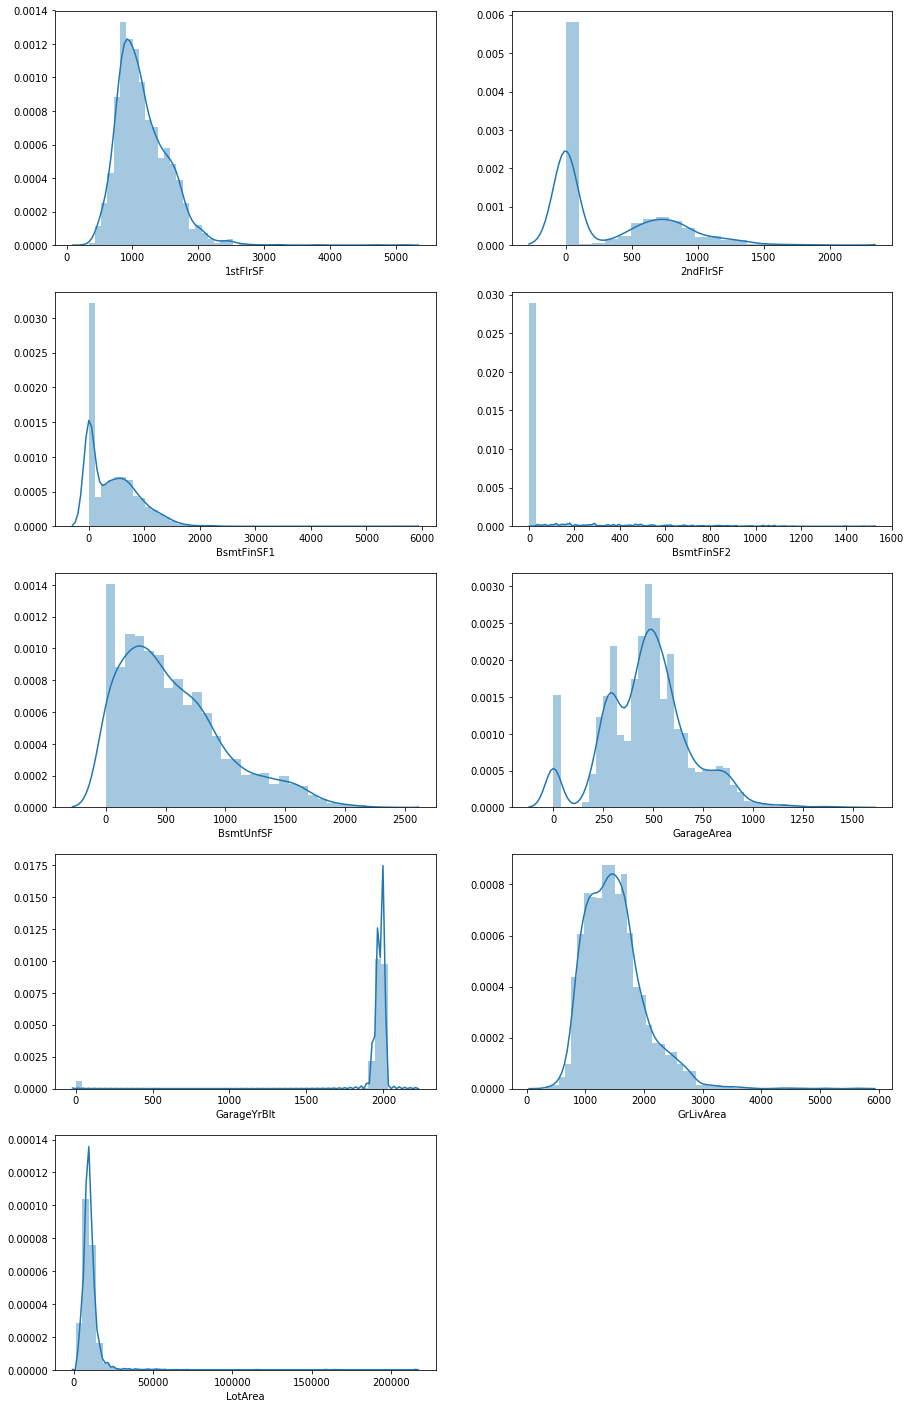

In [391]:
plt.figure(figsize=(15,25))
plt.subplot(521)
sns.distplot(data2['1stFlrSF'])
plt.subplot(522)
sns.distplot(data2['2ndFlrSF'])
plt.subplot(523)
sns.distplot(data2['BsmtFinSF1'])
plt.subplot(524)
sns.distplot(data2['BsmtFinSF2'])
plt.subplot(525)
sns.distplot(data2['BsmtUnfSF'])
plt.subplot(526)
sns.distplot(data2['GarageArea'])
plt.subplot(527)
sns.distplot(data2['GarageYrBlt'])
plt.subplot(528)
sns.distplot(data2['GrLivArea'])
plt.subplot(529)
sns.distplot(data2['LotArea'])
# plt.subplot(5210)
# sns.distplot(data2['LotFrontage'])
plt.show()

In [361]:
data2.iloc[:5,20:37]

,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,
1,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2003,2003,2008
2,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
3,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2001,2002,2008
4,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,1915,1970,2006
5,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2000,2000,2008


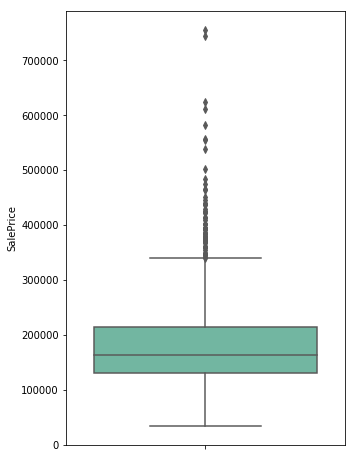

In [329]:
plt.figure(figsize=(5,8))
sns.boxplot(train['SalePrice'],orient="v",palette='Set2')

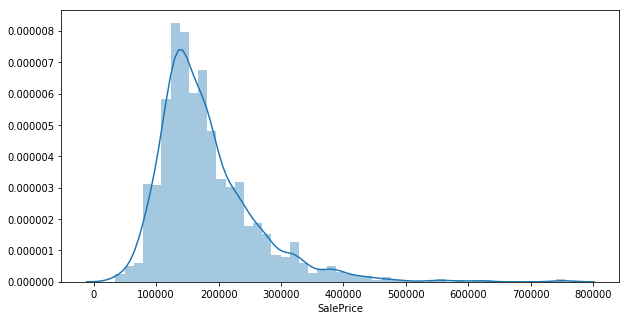

In [337]:
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])

In [ ]:
# sns.countplot=

In [323]:
# #print(data2.cov())
# from matplotlib.pyplot import cm
# sns.heatmap(data2.cov(),cmap=cm.Blues,annot=True) # cmap to make only one color from light to dark
# plt.show()

In [290]:
x = train_dum.drop(['SalePrice'],1)
y = train_dum['SalePrice']
train_x , val_x, train_y, val_y = train_test_split(x,y, test_size=0.2,random_state=123)

In [291]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [292]:
dt = DecisionTreeRegressor(random_state=123, min_samples_split=100, min_samples_leaf=10)
dt.fit(train_x,train_y)
dtpred = dt.predict(val_x)

rf = RandomForestRegressor(random_state=123, min_samples_split=100, min_samples_leaf=10)
rf.fit(train_x,train_y)
rfpred = rf.predict(val_x)

gb = GradientBoostingRegressor(random_state=123)
gb.fit(train_x,train_y)
gbpred = gb.predict(val_x)

In [293]:
print(dt.score(val_x,val_y))
print(rf.score(val_x,val_y))
print(gb.score(val_x,val_y))

0.7445144468198779
0.7507714696576454
0.9016111409479519


In [294]:
test_dum.shape

(1459, 259)

In [295]:
test_d = test_dum.drop(['SalePrice'],1)
test_d.loc[:, "TotalBsmtSF"] = test_d.loc[:, "TotalBsmtSF"].fillna(0)
test_d.loc[:, "BsmtFinSF2"] = test_d.loc[:, "BsmtFinSF2"].fillna(0)
test_d.loc[:, "BsmtFinSF1"] = test_d.loc[:, "BsmtFinSF1"].fillna(0)
test_d.loc[:, "GarageYrBlt"] = test_d.loc[:, "GarageYrBlt"].fillna(0)

In [296]:
prediksi = gb.predict(test_d)

In [297]:
test_d.isnull().sum()[test_d.isnull().sum() > 0]

Series([], dtype: int64)

In [298]:
df = pd.DataFrame(prediksi, columns=['SalePrice'])

In [299]:
df_submit = pd.concat([test.reset_index()['Id'], df], axis=1)
df_submit = df_submit.set_index('Id')
df_submit.to_csv('D:/HousePrice.csv', index=True, header=True)
df_submit.head()

,SalePrice
Id,
1461,121411.947877
1462,161053.871537
1463,178023.447287
1464,181183.374811
1465,185387.796645


In [300]:
df_submit.shape

(1459, 1)